<a href="https://colab.research.google.com/github/Dewa-07/2025_PBO_TI1B/blob/main/Klasifikasi%20Gambar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##JOBSHEET 02 :KLASIFIKASI GAMBAR


###D1 –Memulai Klasifikasi Gambar (MNIST)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


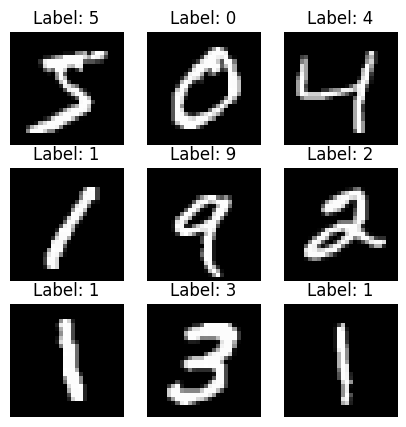

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()

###D2 – Klasifikasi Tradisional dengan SVM (MNIST)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten (28x28 → 784)
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM dengan kernel linear
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # subset (5000 sampel)

# Prediksi
y_pred = clf.predict(x_test_flat)
print("Akurasi SVM:", accuracy_score(y_test, y_pred))


Akurasi SVM: 0.9101


###D3 – CNN Sederhana (MNIST)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.8302 - loss: 0.5732 - val_accuracy: 0.9792 - val_loss: 0.0680
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9784 - loss: 0.0711 - val_accuracy: 0.9855 - val_loss: 0.0509
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9840 - loss: 0.0513 - val_accuracy: 0.9883 - val_loss: 0.0447
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9874 - loss: 0.0395 - val_accuracy: 0.9877 - val_loss: 0.0401
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9898 - loss: 0.0316 - val_accuracy: 0.9887 - val_loss: 0.0388

Test Accuracy: 0.9878


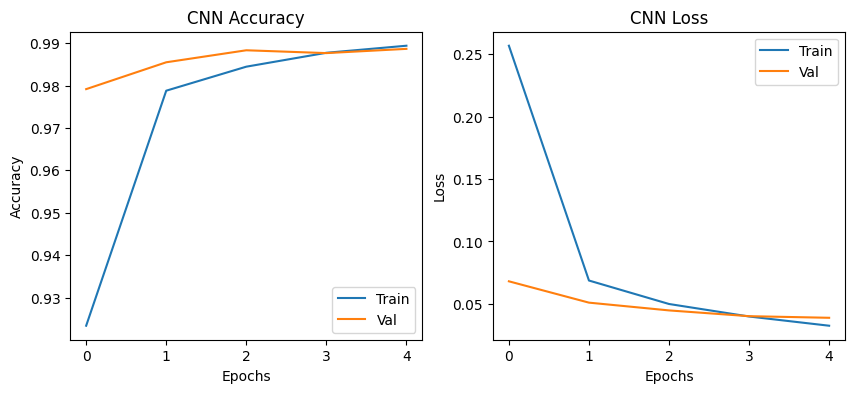

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load dataset MNIST
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocessing
x_train_cnn = x_train.reshape(-1,28,28,1).astype("float32") / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1).astype("float32") / 255.0

# 3. Bangun CNN sederhana
model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Training model
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1, batch_size=128)

# 6. Evaluasi
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 7. Plot akurasi & loss
plt.figure(figsize=(10,4))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


###D4 – CNN dengan Dataset CIFAR-10 (RGB)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.2803 - loss: 1.9360 - val_accuracy: 0.5212 - val_loss: 1.3534
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.4596 - loss: 1.4903 - val_accuracy: 0.5890 - val_loss: 1.2088
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.5046 - loss: 1.3680 - val_accuracy: 0.6164 - val_loss: 1.1100
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5430 - loss: 1.2702 - val_accuracy: 0.6414 - val_loss: 1.0496
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5722 - loss: 1.1980 - val_accuracy: 0.6510 - val_loss: 1.0221
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.5902 - loss: 1.1515 - val_accuracy: 0.6662 - val_loss: 0.9736
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.6032 - loss: 1.1182 - val_accuracy: 0.6738 - val_loss: 0.9444
Epoch 8/10
1407/1407 ━━

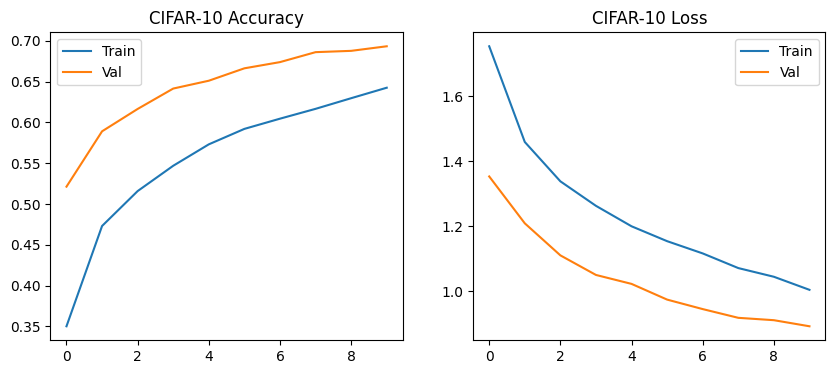

In [ ]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# CNN untuk CIFAR-10
model_cifar = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_cifar = model_cifar.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Plot training
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_cifar.history['accuracy'], label='Train')
plt.plot(history_cifar.history['val_accuracy'], label='Val')
plt.title("CIFAR-10 Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cifar.history['loss'], label='Train')
plt.plot(history_cifar.history['val_loss'], label='Val')
plt.title("CIFAR-10 Loss")
plt.legend()
plt.show()


###D5 – Transfer Learning (VGG16/ResNet50)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Contoh: jika pakai CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize ke 224x224 agar cocok dengan VGG16
import tensorflow as tf
x_train = tf.image.resize(x_train, (224,224)) / 255.0
x_test = tf.image.resize(x_test, (224,224)) / 255.0

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(224,224,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Plot grafik
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


###D6 – Evaluasi dengan Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.81      0.84      0.83      1000
           2       0.58      0.53      0.55      1000
           3       0.50      0.47      0.49      1000
           4       0.61      0.64      0.62      1000
           5       0.62      0.57      0.59      1000
           6       0.74      0.79      0.76      1000
           7       0.79      0.73      0.76      1000
           8       0.71      0.87      0.79      1000
           9       0.83      0.72      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



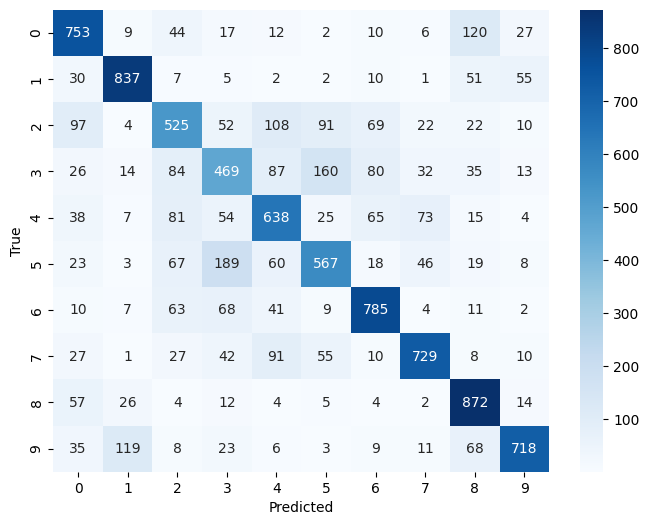

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prediksi data test
y_pred = model_cifar.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Tugas Kecil


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


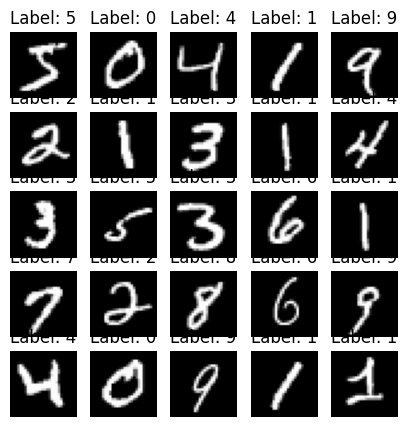

In [ ]:
	import numpy as np
	import matplotlib.pyplot as plt
	from tensorflow.keras.datasets import mnist

	(x_train, y_train), (x_test, y_test) = mnist.load_data()

	plt.figure(figsize=(5,5))
	for i in range(25):
	    plt.subplot(5,5,i+1)
	    plt.imshow(x_train[i], cmap='gray')
	    plt.title(f"Label: {y_train[i]}")
	    plt.axis('off')
	plt.show()


In [ ]:
	from sklearn import svm
	from sklearn.metrics import accuracy_score

	x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
	x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

	clf = svm.SVC(kernel='rbf', gamma='scale')
	clf.fit(x_train_flat[:5000], y_train[:5000])

	y_pred = clf.predict(x_test_flat)

	print("Akurasi (kernel linear):", accuracy_score(y_test, y_pred))


Akurasi (kernel linear): 0.9513


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8944 - loss: 0.3543 - val_accuracy: 0.9803 - val_loss: 0.0720
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9814 - loss: 0.0628 - val_accuracy: 0.9825 - val_loss: 0.0581
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9878 - loss: 0.0401 - val_accuracy: 0.9830 - val_loss: 0.0608
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9860 - val_loss: 0.0518
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9890 - val_loss: 0.0446


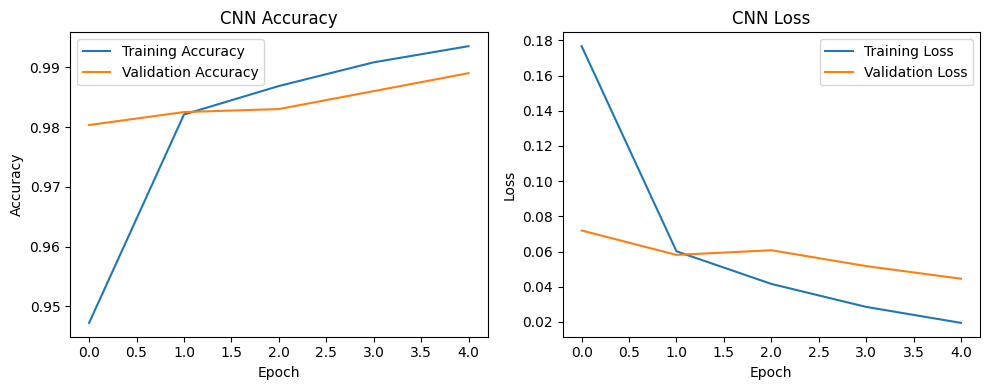

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ===== Preprocessing data (pastikan x_train, x_test, y_train sudah tersedia) =====
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# ===== Define CNN model =====
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ===== Compile model =====
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===== Train model =====
history = model.fit(
    x_train_cnn, y_train,
    epochs=5,
    validation_split=0.1
)

# ===== Plot training history =====
plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.8984 - loss: 0.3342 - val_accuracy: 0.9845 - val_loss: 0.0533
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9848 - loss: 0.0498 - val_accuracy: 0.9872 - val_loss: 0.0407
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9891 - loss: 0.0327 - val_accuracy: 0.9900 - val_loss: 0.0378
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.9903 - val_loss: 0.0373
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9888 - val_loss: 0.0426
313/313 - 4s - 12ms/step - accuracy: 0.9900 - loss: 0.0352

Test accuracy: 0.9900


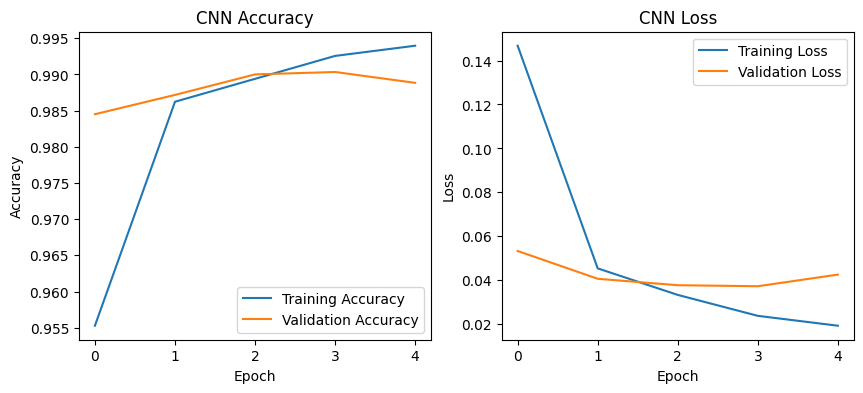

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# ======================================
# 1. Load dataset MNIST
# ======================================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi ke [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape ke format CNN: (n, 28, 28, 1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# ======================================
# 2. Definisi model CNN
# ======================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ======================================
# 3. Training model
# ======================================
history = model.fit(
    x_train_cnn, y_train,
    epochs=5,
    validation_split=0.1
)

# ======================================
# 4. Evaluasi di data test
# ======================================
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# ======================================
# 5. Plot grafik akurasi & loss
# ======================================
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## klasifikasi tulisan

In [7]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7505 - loss: 2.2357 - val_accuracy: 0.9677 - val_loss: 0.1186
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9672 - loss: 0.1195 - val_accuracy: 0.9750 - val_loss: 0.0896
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9816 - loss: 0.0658 - val_accuracy: 0.9777 - val_loss: 0.0837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9777 - val_loss: 0.0810
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9761 - val_loss: 0.0884


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import joblib


In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test  = x_test.reshape(-1,28,28,1).astype('float32')/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# latih singkat (ubah epochs bila mau lebih lama)
history = model.fit(x_train, y_train, epochs=3, validation_split=0.1, batch_size=128)

# simpan model supaya bisa di-load nanti
model.save('mnist_cnn.h5')
print("CNN terlatih dan disimpan sebagai mnist_cnn.h5")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.8412 - loss: 0.5668 - val_accuracy: 0.9813 - val_loss: 0.0699
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9779 - loss: 0.0711 - val_accuracy: 0.9838 - val_loss: 0.0564
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - accuracy: 0.9849 - loss: 0.0486 - val_accuracy: 0.9870 - val_loss: 0.0483


CNN terlatih dan disimpan sebagai mnist_cnn.h5


In [4]:
model = load_model('mnist_cnn.h5')
print("Model CNN dimuat:", model)


Model CNN dimuat: <Sequential name=sequential, built=True>


In [5]:
from tensorflow.keras.datasets import mnist
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()
X = np.concatenate([x_tr, x_te], axis=0).reshape(-1, 28*28).astype('float32')/255.0
y = np.concatenate([y_tr, y_te], axis=0).astype(str)

X_sub, _, y_sub, _ = train_test_split(X, y, train_size=10000, stratify=y, random_state=42)

clf = svm.SVC(kernel='rbf', gamma='scale', probability=True)
clf.fit(X_sub, y_sub)

joblib.dump(clf, 'mnist_svm_subset.joblib')
print("SVM terlatih dan disimpan sebagai mnist_svm_subset.joblib")


SVM terlatih dan disimpan sebagai mnist_svm_subset.joblib


In [6]:
clf = joblib.load('mnist_svm_subset.joblib')
print("SVM dimuat:", clf)


SVM dimuat: SVC(probability=True)


In [7]:
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Input: PIL image
    Output:
      - disp: PIL 28x28 grayscale untuk ditampilkan
      - arr: numpy array shape (28,28,1) float32 normalized [0,1]
    """
    img = img_pil.convert('L')               # grayscale
    img = ImageOps.autocontrast(img)         # tingkatkan kontras
    arr = np.array(img).astype(np.uint8)

    # invert jika latar terlalu gelap/terang (buat digit putih di latar gelap)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # bounding box sederhana
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # resize ke 20x20, lalu pad ke 28x28 (mirip preprocessing MNIST asli)
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)

    return canvas, arr


In [8]:
from google.colab import files
uploaded = files.upload()

print("Files:", list(uploaded.keys()))


Saving WhatsApp Image 2025-09-22 at 22.06.52_fdd2131f.jpg to WhatsApp Image 2025-09-22 at 22.06.52_fdd2131f (1).jpg
Files: ['WhatsApp Image 2025-09-22 at 22.06.52_fdd2131f (1).jpg']


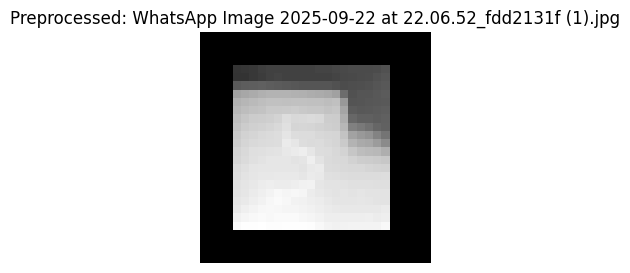

In [9]:
# ganti fname sesuai file terupload (ambil nama pertama)
fname = list(uploaded.keys())[0]
img_pil = Image.open(fname)

disp, arr = preprocess_to_mnist_28x28(img_pil)

plt.figure(figsize=(3,3))
plt.imshow(disp, cmap='gray')
plt.title(f"Preprocessed: {fname}")
plt.axis('off')
plt.show()


In [10]:
x_batch = np.expand_dims(arr, axis=0)
probs = model.predict(x_batch, verbose=0)[0]
pred = int(np.argmax(probs))
conf = float(np.max(probs))

print(f"CNN -> Prediksi: {pred}, Probabilitas: {conf:.3f}")


CNN -> Prediksi: 8, Probabilitas: 0.588


In [11]:
x_flat = arr.reshape(1, -1).astype('float32')
pred_svm = clf.predict(x_flat)[0]
prob_svm = None
if hasattr(clf, "predict_proba"):
    try:
        prob_svm = float(np.max(clf.predict_proba(x_flat)))
    except:
        prob_svm = None

print("SVM -> Prediksi:", pred_svm, (f"(prob≈{prob_svm:.3f})" if prob_svm is not None else ""))


SVM -> Prediksi: 8 (prob≈0.648)


In [12]:
out_name = "preprocessed_28x28.png"
disp.save(out_name)
print("Gambar 28x28 disimpan sebagai", out_name)

with open("rekap_prediksi.txt", "w") as f:
    f.write(f"file: {fname}\n")
    f.write(f"CNN_pred: {pred} (p={conf:.3f})\n")
    f.write(f"SVM_pred: {pred_svm}" + (f" (p≈{prob_svm:.3f})\n" if prob_svm is not None else "\n"))

print("Rekap disimpan: rekap_prediksi.txt")


Gambar 28x28 disimpan sebagai preprocessed_28x28.png
Rekap disimpan: rekap_prediksi.txt
